<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Feature_importance_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Importance
อ้างอิง : https://youtu.be/Uojkhn-EXac?si=6n7IHb0XQWt9Rj7g
PCA
อ้างอิง : https://youtu.be/z8APHNo1iA4?si=r-lY4vGMC0a2lneF

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign 6: MissingValue/MissForest.xlsx')

In [3]:
df.head()

,Unnamed: 0,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,Recent_Date,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Recent_Creatinine,Recent_eGFR
0,0,2299,3386255,-7.158596,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2559-08-15 08:13:26.043,...,91.0,5.400,215.0,81.0,123.0,99.0,57.671,1,0.73,79.14
1,1,2299,4546471,5.550691,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2560-10-03 07:37:22.777,...,86.0,5.567,219.0,64.0,146.0,73.0,146.106,1,0.73,79.14
2,2,2299,5812902,-6.063710,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2561-12-12 07:58:57.190,...,100.0,5.300,193.0,62.0,129.0,65.0,50.831,1,0.73,79.14
3,3,2299,6947220,-12.812245,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2562-12-19 08:19:38.647,...,89.0,5.292,205.0,69.0,139.0,76.0,121.937,1,0.73,79.14
4,4,2299,8186767,28.287500,0,1,0,2565-11-03 09:37:44.910,เวชปฏิบัติทั่วไป (OPD)-D03,2564-03-04 07:55:40.703,...,88.0,5.500,198.0,74.0,129.0,60.0,41.564,1,0.73,79.14


In [4]:
df.shape #ข้อมูลมีทั้งหมด 52620 แถว  84 คอลัมน์

(52620, 84)

In [5]:
df.columns

Index(['Unnamed: 0', 'PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient',
       'OutPatient', 'Emergency', 'Recent_Date', 'VisitLocation', 'StartDTTM',
       'EndDttm', 'LabCwhen', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'Sex', 'Age', 'NATNL', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Hear

In [6]:
#เพิ่ม slope,L1-eGFR เพื่อใช้เป็นตัวเเปร y ในการทำนายหา feature impotant
selected_columns = ['Slopes', 'L1-eGFR','InPatient',
       'OutPatient', 'Emergency', 'Sex', 'Age', 'NATNL', 'VisitLocation',
       'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
      'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
df = df[selected_columns]
df.head()

,Slopes,L1-eGFR,InPatient,OutPatient,Emergency,Sex,Age,NATNL,VisitLocation,G1M2-ARB,...,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
0,-7.158596,71.70,0,1,0,1,73,0,เวชปฏิบัติทั่วไป (OPD)-D03,90,...,41.678,4.9104,195.63,91.0,5.400,215.0,81.0,123.0,99.0,57.671
1,5.550691,63.60,0,1,0,1,74,0,เวชปฏิบัติทั่วไป (OPD)-D03,90,...,41.409,5.6073,267.72,86.0,5.567,219.0,64.0,146.0,73.0,146.106
2,-6.063710,70.20,0,1,0,1,75,0,เวชปฏิบัติทั่วไป (OPD)-D03,100,...,32.400,9.4100,313.00,100.0,5.300,193.0,62.0,129.0,65.0,50.831
3,-12.812245,64.02,0,1,0,1,76,0,เวชปฏิบัติทั่วไป (OPD)-D03,35,...,41.351,5.2678,199.66,89.0,5.292,205.0,69.0,139.0,76.0,121.937
4,28.287500,48.54,0,1,0,1,78,0,เวชปฏิบัติทั่วไป (OPD)-D03,100,...,34.600,5.4200,434.00,88.0,5.500,198.0,74.0,129.0,60.0,41.564


#Feature Impotant

หา Feature Impotant ก่อนนำไปทำ PCA

In [7]:
df.shape #จาก 84 คอลัมน์เลือกมา 72 คอลัมน์ ที่ใช้โดยไม่รวม  slope, L1-eGFR

(52620, 74)

##slope

In [8]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=250, random_state=7)
# model= ExtraTreesClassifier(n_estimators=250, random_state=7)
X=df[['InPatient',
       'OutPatient', 'Emergency', 'Sex', 'Age', 'NATNL',
       'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
      'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio' ]]
y=df['Slopes']
model.fit(X,y)

RandomForestRegressor(n_estimators=250, random_state=7)

In [9]:
model.feature_importances_

array([3.59629757e-03, 2.69215271e-03, 1.42153789e-03, 2.47239504e-02,
       5.13336426e-02, 4.98408041e-04, 3.16021455e-03, 6.42362158e-03,
       2.09976710e-03, 9.06519649e-03, 3.88286387e-03, 3.75734569e-03,
       2.01692879e-03, 3.46954328e-03, 3.95618410e-03, 1.50878605e-03,
       2.98024041e-03, 1.83778476e-03, 5.77480297e-04, 1.63519216e-03,
       4.94381167e-03, 2.76457356e-03, 3.22377812e-03, 1.23266446e-03,
       1.60361322e-04, 8.51366765e-04, 1.66626995e-03, 4.35117697e-05,
       0.00000000e+00, 2.26629769e-04, 2.94580048e-02, 2.53377772e-02,
       2.64236809e-02, 3.23975817e-02, 3.06880488e-03, 2.72867304e-03,
       1.58543574e-03, 1.03060818e-03, 5.62083726e-04, 1.13423787e-03,
       1.10550750e-04, 6.63965803e-04, 1.37485568e-03, 7.68751489e-04,
       5.49750508e-04, 1.01699683e-03, 7.65919289e-04, 8.43801012e-04,
       3.24117084e-03, 1.50179605e-03, 3.33079541e-02, 1.43638204e-01,
       2.21703508e-02, 2.44330494e-02, 2.41666575e-02, 3.38047703e-02,
      

In [10]:
fs_slope=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs_slope

G2M7-GLP1-RA                  0.000000
G5M1-Ketoanalog-amino-acid    0.000044
D7-HIV-infection              0.000111
G4M2-Febuxostat               0.000160
G4M3-Uricosuric-agent         0.000227
                                ...   
L7-Bicarbonate                0.033805
L28-UrineProtein-Cr-ratio     0.035901
L10-Phosphorus                0.037270
Age                           0.051334
L3-Creatinine                 0.143638
Length: 71, dtype: float64

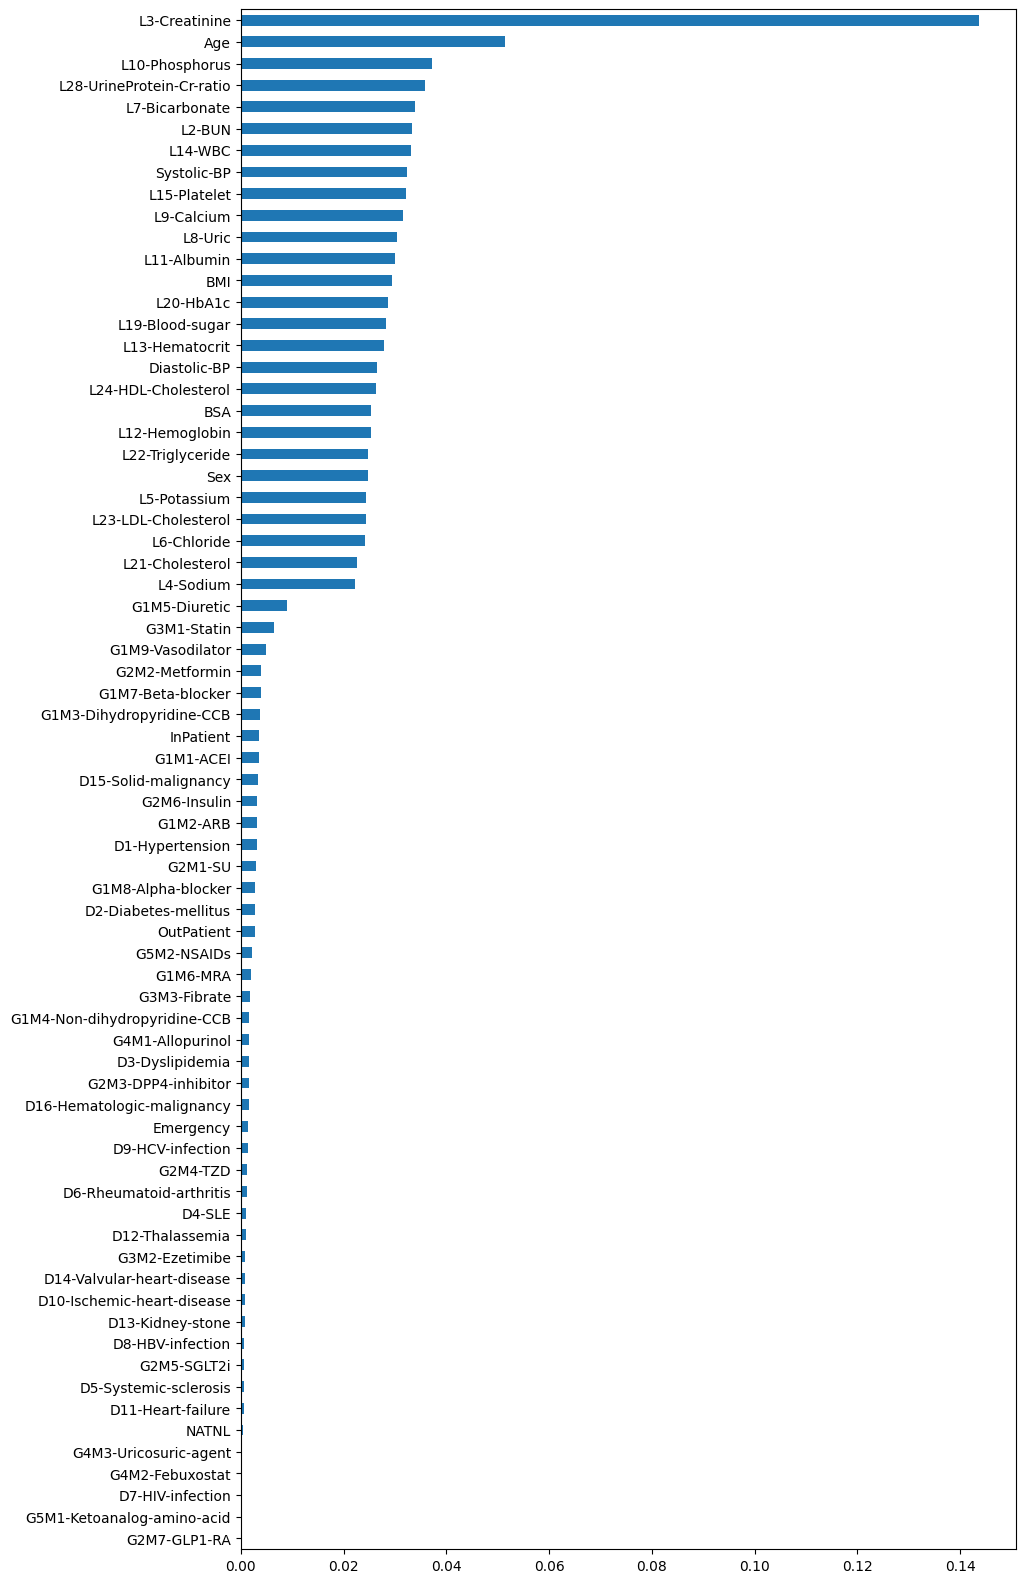

In [11]:
import matplotlib.pyplot as plt
fs_slope.plot(kind='barh', figsize=(10, 20))
plt.show()

In [13]:
slope_ip =fs_slope[fs_slope > .02].index#เรียงความสำคัญจากน้อยไปมาก #มี 27 คอลัมน์ที่สำคัญ
slope_ip

Index(['L4-Sodium', 'L21-Cholesterol', 'L6-Chloride', 'L23-LDL-Cholesterol',
       'L5-Potassium', 'Sex', 'L22-Triglyceride', 'L12-Hemoglobin', 'BSA',
       'L24-HDL-Cholesterol', 'Diastolic-BP', 'L13-Hematocrit',
       'L19-Blood-sugar', 'L20-HbA1c', 'BMI', 'L11-Albumin', 'L8-Uric',
       'L9-Calcium', 'L15-Platelet', 'Systolic-BP', 'L14-WBC', 'L2-BUN',
       'L7-Bicarbonate', 'L28-UrineProtein-Cr-ratio', 'L10-Phosphorus', 'Age',
       'L3-Creatinine'],
      dtype='object')

## eGFR

In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=250, random_state=7)
x=df[['InPatient',
       'OutPatient', 'Emergency', 'Sex', 'Age', 'NATNL',
       'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
      'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L2-BUN',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio' ]]
y=df['L1-eGFR']
model.fit(x,y)

RandomForestRegressor(n_estimators=250, random_state=7)

In [15]:
model.feature_importances_

array([1.92797413e-03, 2.90836461e-03, 4.17799149e-04, 6.78214047e-03,
       7.25411657e-02, 1.41615358e-04, 1.32271211e-03, 3.38765954e-03,
       1.06790608e-03, 1.11633825e-03, 1.48145363e-03, 1.87385245e-03,
       4.02614663e-04, 2.26531851e-03, 7.01661554e-03, 8.15583349e-04,
       1.17273841e-03, 2.14928987e-04, 1.38453840e-04, 3.22349141e-03,
       1.44233812e-03, 1.20386343e-03, 1.04307157e-03, 3.73801160e-04,
       1.60027032e-04, 2.26930353e-04, 5.08374722e-04, 2.93976884e-04,
       0.00000000e+00, 8.47667675e-05, 1.20187098e-02, 1.27431127e-02,
       1.01623904e-02, 1.09787521e-02, 1.32916529e-03, 1.33687987e-03,
       8.32502332e-04, 1.89081291e-04, 5.67492627e-05, 2.14110356e-04,
       2.63763880e-05, 1.68563295e-04, 1.41126075e-04, 3.34890335e-04,
       1.10152401e-04, 8.06618206e-05, 2.14799635e-04, 2.44091049e-04,
       5.26848534e-04, 3.35295478e-04, 4.04128452e-01, 9.75298106e-03,
       1.08929806e-02, 1.25748867e-02, 1.30143604e-02, 1.26909518e-01,
      

In [16]:
fs_egfr=pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=True)
fs_egfr

G2M7-GLP1-RA                 0.000000
D7-HIV-infection             0.000026
D5-Systemic-sclerosis        0.000057
D12-Thalassemia              0.000081
G4M3-Uricosuric-agent        0.000085
                               ...   
L10-Phosphorus               0.020189
L28-UrineProtein-Cr-ratio    0.048270
Age                          0.072541
L8-Uric                      0.126910
L2-BUN                       0.404128
Length: 70, dtype: float64

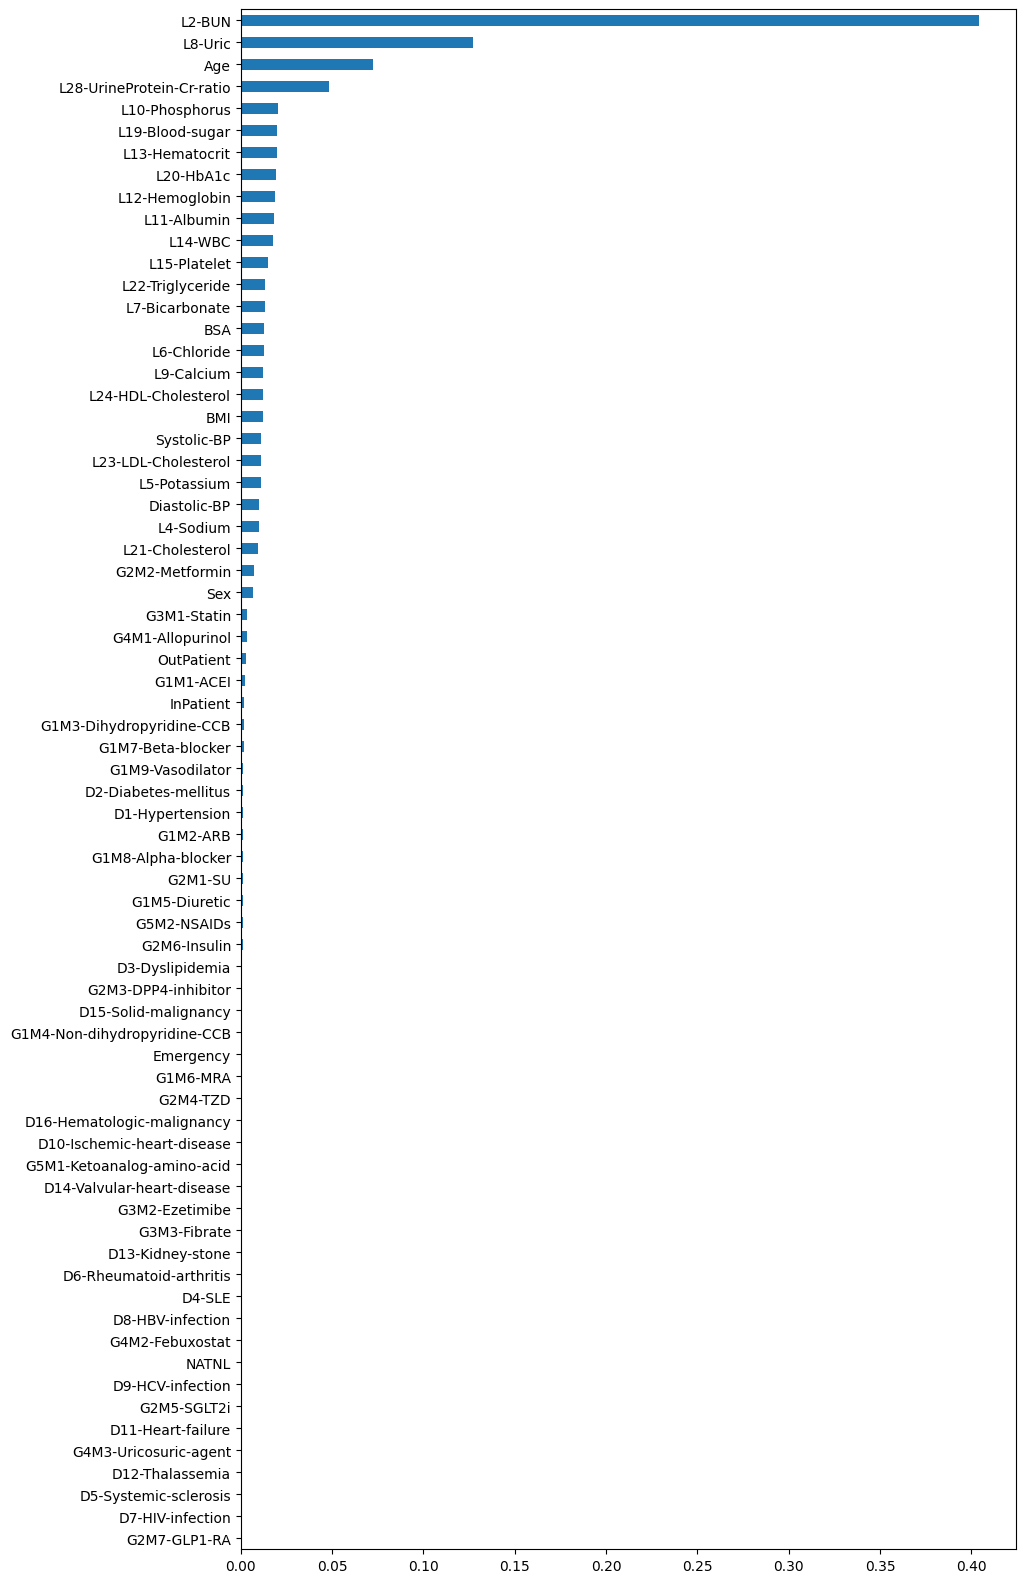

In [17]:
fs_egfr.plot(kind='barh', figsize=(10, 20))
plt.show()

In [19]:
egfr_ip = fs_egfr[fs_egfr > .02].index#เรียงความสำคัญจากน้อยไปมาก #มี 6 คอลัมน์ที่สำคัญ
egfr_ip

Index(['L19-Blood-sugar', 'L10-Phosphorus', 'L28-UrineProtein-Cr-ratio', 'Age',
       'L8-Uric', 'L2-BUN'],
      dtype='object')

#PCA

จากการทำ Feature Importance พบว่า มีทั้งหมด 27 คอลัมน์ ที่สำคัญต่อ eGFR และ Slope โดยมีคอลัมน์ดังต่อไปนี้ (เรียงตามความสำคัญจากน้อยไปมาก)
1. 'L4-Sodium'
2. 'L21-Cholesterol'
3. 'L6-Chloride'
4. 'L23-LDL-Cholesterol',
5. 'L5-Potassium'
6.  'Sex'
7. 'L22-Triglyceride'
8. 'L12-Hemoglobin'
9.  'BSA',
10. 'L24-HDL-Cholesterol'
11. 'Diastolic-BP'
12. 'L13-Hematocrit'
13. 'L19-Blood-sugar'
14. 'L20-HbA1c'
15. 'BMI'
16. 'L11-Albumin'
17. 'L8-Uric'
18.  'L9-Calcium'
19. 'L15-Platelet'
20. 'Systolic-BP'
21. 'L14-WBC'
22.  'L2-BUN',
23. 'L7-Bicarbonate'
24. 'L28-UrineProtein-Cr-ratio'
25.  'L10-Phosphorus'
26. 'Age'
27. 'L3-Creatinine'

In [21]:
#ใช้คอลัมน์ที่ได้จากการหา Feature Importance 27 คอลัมน์ มาใช้ในการทำ PCA
selected_columns = ['Sex','Age','BSA', 'BMI', 'L4-Sodium', 'L21-Cholesterol', 'L6-Chloride', 'L23-LDL-Cholesterol',
       'L5-Potassium', 'L22-Triglyceride', 'L12-Hemoglobin',
       'L24-HDL-Cholesterol', 'Diastolic-BP', 'L13-Hematocrit',
       'L19-Blood-sugar', 'L20-HbA1c', 'L11-Albumin', 'L8-Uric',
       'L9-Calcium', 'L15-Platelet', 'Systolic-BP', 'L14-WBC', 'L2-BUN',
       'L7-Bicarbonate', 'L28-UrineProtein-Cr-ratio', 'L10-Phosphorus',
       'L3-Creatinine']
data = df[selected_columns]
data.head()

,Sex,Age,BSA,BMI,L4-Sodium,L21-Cholesterol,L6-Chloride,L23-LDL-Cholesterol,L5-Potassium,L22-Triglyceride,...,L8-Uric,L9-Calcium,L15-Platelet,Systolic-BP,L14-WBC,L2-BUN,L7-Bicarbonate,L28-UrineProtein-Cr-ratio,L10-Phosphorus,L3-Creatinine
0,1,73,1.39,20.80,141.95,215.0,102.68,123.0,4.667,81.0,...,4.515,9.655,195.63,127.0,4.9104,18.500,26.747,57.671,3.411,0.80
1,1,74,1.38,20.27,141.04,219.0,102.80,146.0,4.771,64.0,...,3.800,9.636,267.72,105.0,5.6073,13.000,26.350,146.106,4.004,0.90
2,1,75,1.38,20.72,143.00,193.0,103.00,129.0,3.800,62.0,...,4.192,8.860,313.00,138.0,9.4100,6.500,29.700,50.831,3.338,0.82
3,1,76,1.36,20.27,141.70,205.0,103.42,139.0,4.300,69.0,...,4.922,9.265,199.66,134.0,5.2678,13.375,26.711,121.937,3.417,0.88
4,1,78,1.33,19.05,141.00,198.0,102.00,129.0,4.400,74.0,...,5.423,9.272,434.00,103.0,5.4200,14.500,27.200,41.564,4.025,1.10


# StandardScaler


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # z-score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [23]:
# สร้าง StandardScaler
scaler = StandardScaler()

# นำข้อมูลมาทำการ scale
# คอลัมน์ที่ไม่ต้องการทำ scaling ถูกนำออก
columns_to_exclude = ['Sex']

# ดึงข้อมูลที่ต้องการทำ scaling จากตัวแปร data
data_to_scale = data.drop(columns=columns_to_exclude)
scale_data = scaler.fit_transform(data_to_scale)

# นำข้อมูลที่ถูก scale แล้วไปใส่ใน DataFrame ใหม่
scale_data = pd.DataFrame(scale_data, columns=data_to_scale.columns)
scale_data['Sex'] = data['Sex']
scale_data


,Age,BSA,BMI,L4-Sodium,L21-Cholesterol,L6-Chloride,L23-LDL-Cholesterol,L5-Potassium,L22-Triglyceride,L12-Hemoglobin,...,L9-Calcium,L15-Platelet,Systolic-BP,L14-WBC,L2-BUN,L7-Bicarbonate,L28-UrineProtein-Cr-ratio,L10-Phosphorus,L3-Creatinine,Sex
0,0.531249,-0.283646,-0.014807,0.741235,0.970161,0.359944,0.306227,0.565846,-0.843492,0.672288,...,0.789632,-0.647948,-0.030987,-0.794095,0.097066,0.690117,-0.487620,-0.030259,-0.597315,1
1,0.617111,-0.292912,-0.015441,0.438126,1.070025,0.397710,0.945928,0.809161,-1.081069,0.659805,...,0.747296,0.262693,-0.048275,-0.564822,-0.571126,0.523460,0.847718,1.262025,-0.483645,1
2,0.702974,-0.292912,-0.014902,1.090976,0.420909,0.460654,0.473106,-1.462562,-1.109019,-1.397360,...,-0.981800,0.834670,-0.022342,0.686231,-1.360808,1.929757,-0.590902,-0.189343,-0.574581,1
3,0.788837,-0.311445,-0.015441,0.657963,0.720501,0.592837,0.751236,-0.292777,-1.011194,0.631275,...,-0.079372,-0.597041,-0.025486,-0.676514,-0.525568,0.675004,0.482774,-0.017183,-0.506379,1
4,0.960563,-0.339243,-0.016902,0.424803,0.545739,0.145935,0.473106,-0.058820,-0.941318,-1.040729,...,-0.063775,2.363143,-0.049847,-0.626442,-0.388892,0.880282,-0.730831,1.307789,-0.256306,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,-0.327380,0.170397,-0.004091,0.757889,-0.278140,-0.168785,-0.778482,-0.526734,2.370785,0.907664,...,1.112724,0.746246,-0.025486,0.985613,0.376492,-0.421068,0.624152,1.035385,0.596215,0
52616,0.359523,-0.061258,-0.008617,0.757889,-0.552766,0.460654,-0.806295,-0.058820,0.763646,0.357858,...,-0.224206,1.441007,-0.030987,0.735580,0.959641,-0.588984,3.561035,1.907078,0.596215,1
52617,-0.069792,0.109518,-0.007048,-2.572980,-1.601338,-0.168785,-1.334743,-0.292777,-0.633865,-0.377990,...,-1.783958,-1.464355,-0.028629,-0.892924,1.664280,-2.645956,-0.349745,-0.054230,-0.131270,0
52618,0.016071,0.101734,-0.006272,-0.574458,0.613896,-0.168785,0.767646,1.110966,-0.249410,0.148040,...,-0.054862,0.733614,-0.023128,0.696101,0.631620,0.208618,-0.304764,0.128825,-0.210838,0


In [24]:
scale_data.describe().round(2)

,Age,BSA,BMI,L4-Sodium,L21-Cholesterol,L6-Chloride,L23-LDL-Cholesterol,L5-Potassium,L22-Triglyceride,L12-Hemoglobin,...,L9-Calcium,L15-Platelet,Systolic-BP,L14-WBC,L2-BUN,L7-Bicarbonate,L28-UrineProtein-Cr-ratio,L10-Phosphorus,L3-Creatinine,Sex
count,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,...,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00,52620.00
mean,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,...,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.48
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50
min,-4.19,-1.57,-0.04,-11.23,-3.67,-11.18,-3.09,-5.67,-1.70,-7.40,...,-19.61,-3.12,-0.13,-2.41,-2.14,-8.40,-1.36,-7.25,-1.26,0.00
25%,-0.58,-0.12,-0.01,-0.24,-0.58,-0.48,-0.64,-0.53,-0.55,-0.59,...,-0.50,-0.53,-0.03,-0.44,-0.55,-0.51,-0.67,-0.61,-0.38,0.00
50%,0.02,-0.01,-0.01,0.20,-0.05,0.15,-0.05,-0.02,-0.20,0.07,...,0.06,-0.08,-0.02,-0.12,-0.24,0.17,-0.19,-0.06,-0.15,0.00
75%,0.70,0.09,-0.01,0.50,0.42,0.47,0.42,0.64,0.25,0.70,...,0.65,0.43,-0.01,0.27,0.26,0.60,0.49,0.60,0.08,1.00
max,3.02,152.49,223.70,5.42,17.20,5.50,16.16,13.74,28.64,5.91,...,19.38,25.71,100.56,95.27,21.47,6.00,34.28,19.99,27.02,1.00


In [25]:
pca = PCA() #ไม่ได้กำหนดจำนวน components ที่ต้องการ
pca.fit_transform(scale_data)

print(f'explained_variance  = {pca.explained_variance_}') # Eigenvalues
print(f'explained_variance_ratio  = {pca.explained_variance_ratio_}') #แต่ละ component อธิบาย varience ได้เท่าไหร่
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance  = [3.36463599 2.85235319 2.24243055 1.80225132 1.69217956 1.42670601
 1.14816281 1.04575308 1.00769242 1.00412256 0.99558051 0.96961073
 0.95656287 0.89406324 0.83312762 0.70850771 0.60453809 0.56030536
 0.52699883 0.47382548 0.36503231 0.25261833 0.20046853 0.13780755
 0.12603313 0.03398611 0.02474227]
explained_variance_ratio  = [0.12817614 0.10866068 0.08542561 0.06865694 0.06446375 0.05435051
 0.04373938 0.03983807 0.03838814 0.03825215 0.03792674 0.03693742
 0.03644036 0.03405943 0.03173808 0.02699067 0.02302994 0.02134489
 0.02007607 0.01805043 0.01390594 0.00962352 0.00763687 0.00524979
 0.00480124 0.0012947  0.00094256]
sum explained_variance_ratio = 1.0


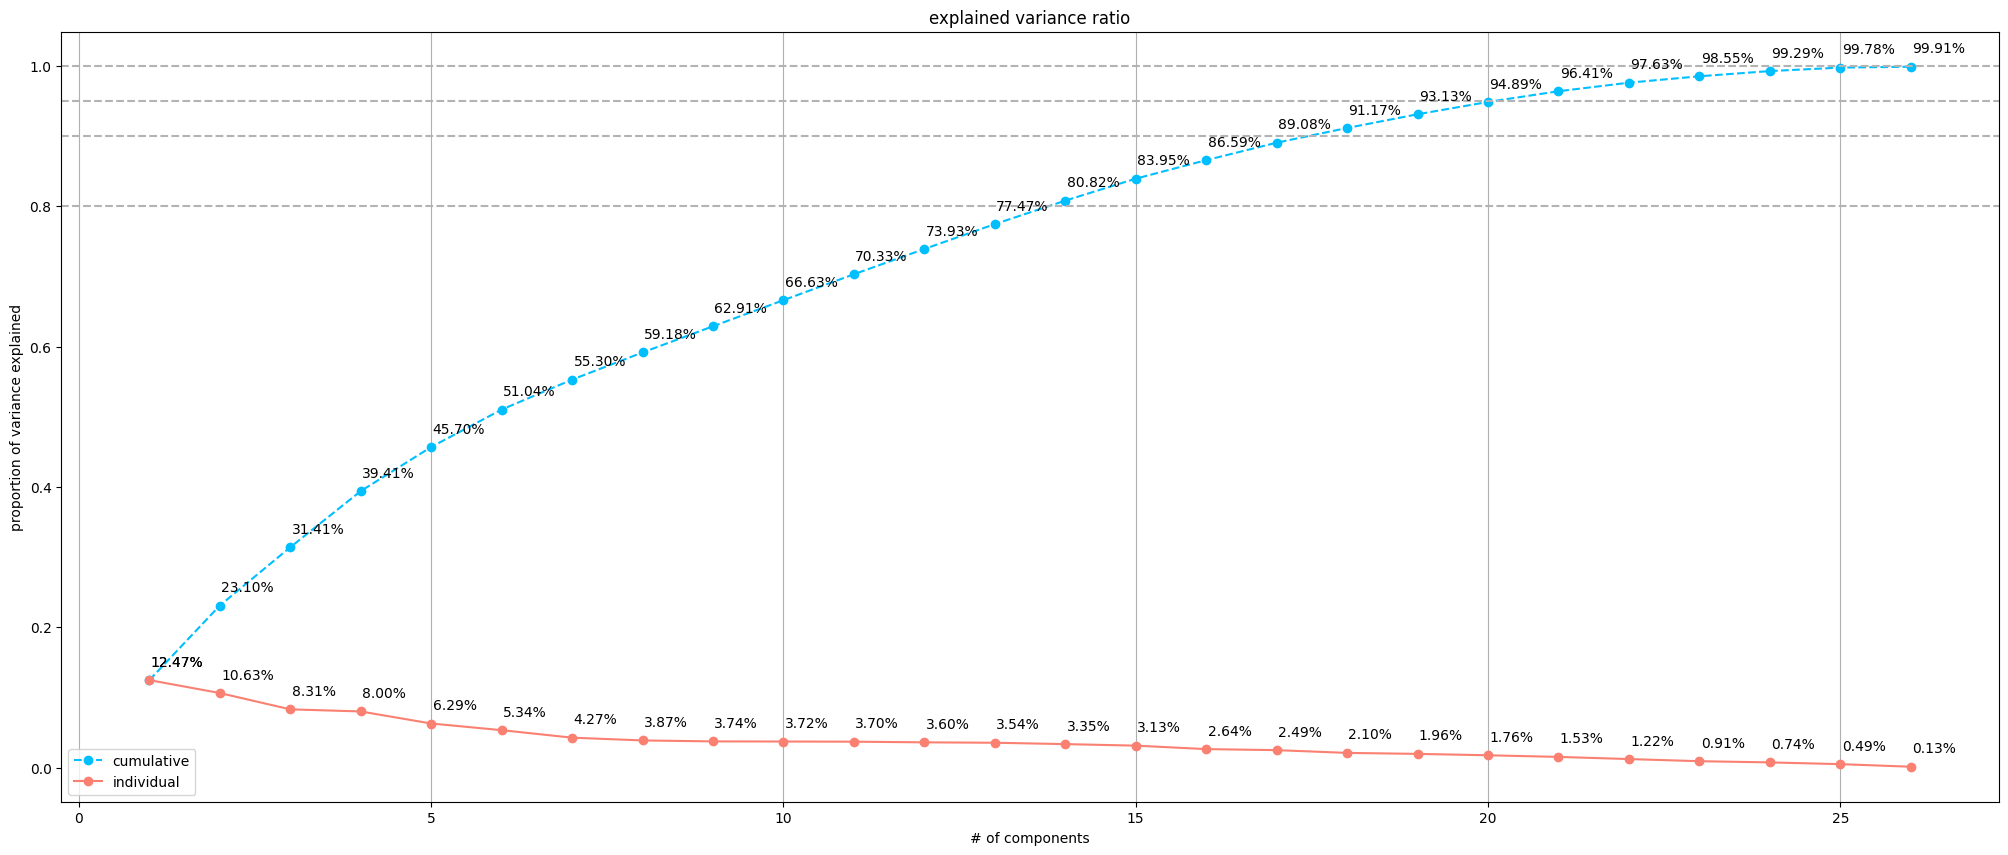

In [26]:
# ในส่วนที่ทำ Scree Plot
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(25, 10)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t = scaler.fit_transform(X)

    max_components = min(X.shape)
    x = np.arange(1, n_components + 1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1 = pca.explained_variance_ratio_[:n_components]
    y2 = np.cumsum(pca.explained_variance_ratio_)[:n_components]

    plt.figure(figsize=figsize)

    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker='o', label='cumulative', color='deepskyblue')

    plt.plot(x, y1, linestyle='-', marker='o', label='individual', color='salmon')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']),
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
            plt.text(n + .02, v + .02, f'{v * 100:.2f}%', fontsize=10)
            if with_cumulative:
                plt.text(n + .02, cv + .02, f'{cv * 100:.2f}%', fontsize=10)

    plt.show()
scree_plot(scale_data, n_components=26, with_cumulative=True, show_data_label=True)



คอลัมน์ที่เรามีคือ 27 คอลัมน์ ในการลดจำนวนโดยทั้วไปพิจารณาที่ 90-95 % ขึ้นไป (อ้างอิง: กอบเกียรติ สระอุบล, เรียนรู้ Data Science และ AI:Machine learning ด้วย python (2563 )
หากเลือกที่ 18 componant จะอธิบายข้อมูลได้ 91.17 % (จะเอามากกว่านี้ก็ได้)

In [27]:
pca.components_ # Eigenvectors

array([[ 2.98326461e-02, -2.05665915e-03, -7.03532999e-04,
        -3.32751825e-01, -1.59311665e-01, -2.32133352e-01,
        -1.59130150e-01,  2.36958466e-02,  5.18241401e-02,
        -3.58621977e-01, -1.95007142e-01, -2.99148401e-03,
        -3.67447954e-01,  2.90234523e-01,  2.70365672e-01,
         1.29550697e-05,  1.12177034e-01, -1.87398846e-01,
         1.17559815e-01,  5.02110382e-03,  1.75619933e-01,
         2.96495300e-01, -2.61834820e-01,  6.28032486e-02,
         1.09251640e-01,  2.37924063e-01,  1.42401019e-02],
       [-1.88783115e-01,  2.36909968e-02,  6.84469492e-04,
        -3.40074793e-02,  3.79774437e-01, -1.35554284e-01,
         3.41439914e-01,  1.86023278e-01,  3.43723839e-01,
         2.42728133e-01, -3.74148297e-02,  7.26608224e-03,
         2.43761856e-01,  1.80262989e-01,  2.19337887e-01,
         4.86016833e-04,  2.47007134e-01,  2.68895552e-01,
         2.07695191e-01,  7.56094406e-03,  1.62938981e-01,
         1.17785428e-01,  3.89004405e-02,  2.70467525e-

In [28]:
import pandas as pd

# ให้ features ของ scale_data เป็น index
dpc = pd.DataFrame(pca.components_.T,
                   index=scale_data.columns,
                   columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4)

# ทำการแปลงข้อมูลให้เป็น DataFrame ที่มีขนาดเล็กขึ้น (ในที่นี้เลือก 5 แถวแรก)
dpc_small = dpc.iloc[:27, :]
dpc_small.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
Age,0.029800,-0.188800,0.026400,-0.049300,-0.100300,-0.017500,-0.541400,0.144700,0.019800,-0.011800,0.029100,-0.155200,-0.002200,0.595600,0.224900,0.339600,0.192700,-0.039800,-0.205800,0.001700,0.033300,-0.078400,-0.023900,0.024100,-0.017700,0.008900,-0.003800
BSA,-0.002100,0.023700,-0.006700,0.126300,0.047500,-0.007900,0.142600,0.015100,-0.388800,0.388600,-0.554100,0.362800,-0.384500,0.262100,-0.006400,0.038300,0.031700,0.016700,-0.005700,0.010300,0.005400,0.000600,0.000700,-0.005700,-0.012200,0.002300,0.004600
BMI,-0.000700,0.000700,-0.000400,-0.013300,0.017000,-0.011900,-0.019000,0.089500,0.866600,-0.043800,-0.303400,0.308600,-0.209100,-0.018300,0.073100,0.034200,-0.010300,-0.012100,-0.002500,0.000700,0.003500,-0.000100,0.000100,0.001800,-0.000900,0.000000,-0.000200
L4-Sodium,-0.332800,-0.034000,0.299600,0.022800,-0.089400,0.267700,-0.265900,0.031100,-0.025900,0.056000,-0.096300,0.050200,0.042800,-0.181300,-0.323000,0.186600,-0.087000,-0.046600,-0.021200,-0.006900,-0.001600,-0.048500,0.005600,-0.519900,0.417200,-0.002000,0.010000
L21-Cholesterol,-0.159300,0.379800,-0.040800,-0.371900,0.333300,-0.098600,-0.108900,0.007000,-0.041700,0.002600,-0.000300,0.023400,-0.020400,-0.010800,0.074800,0.121200,-0.035600,-0.011200,0.040800,-0.007000,-0.068000,-0.032300,-0.023200,0.022000,0.013400,0.030600,0.723700
L6-Chloride,-0.232100,-0.135600,0.377000,0.039900,0.071800,0.307200,-0.261000,0.061200,-0.058400,0.096400,-0.173600,0.010600,0.101100,-0.330200,0.036300,0.049100,-0.010900,-0.098300,-0.003700,0.010900,-0.097000,0.014800,0.036900,0.537600,-0.369800,-0.011500,-0.005500
L23-LDL-Cholesterol,-0.159100,0.341400,-0.047400,-0.339100,0.364400,-0.103800,-0.122700,0.020100,-0.043900,0.020900,-0.018200,0.002900,-0.008600,0.016800,0.093600,0.095400,-0.165700,-0.205100,0.129200,-0.231400,0.176000,-0.010400,0.007700,0.002500,0.009000,-0.026900,-0.623800
L5-Potassium,0.023700,0.186000,0.201700,-0.080500,-0.440200,-0.039700,-0.076300,0.030200,-0.045300,0.040600,-0.059600,-0.027000,-0.000500,0.022800,0.510100,-0.238300,-0.266500,-0.251900,0.331300,0.285900,-0.197800,-0.067200,-0.015900,-0.140500,0.020800,-0.010100,-0.002000
L22-Triglyceride,0.051800,0.343700,-0.060700,0.033500,0.077000,0.318700,-0.105600,-0.156000,-0.064100,-0.221800,0.238000,0.256500,-0.249100,-0.040100,0.042400,0.126300,0.297000,0.229400,-0.044100,0.370600,-0.380700,-0.019300,-0.011000,0.018200,0.017600,-0.005700,-0.219200
L12-Hemoglobin,-0.358600,0.242700,-0.089700,0.362400,-0.063900,-0.140000,0.079800,0.018600,0.053600,0.014400,-0.008100,-0.099400,0.079600,0.041700,0.042200,0.029800,0.244400,-0.180300,-0.038200,-0.082300,-0.084800,0.055000,0.030400,-0.022600,-0.054500,-0.708900,0.034600


<Axes: >

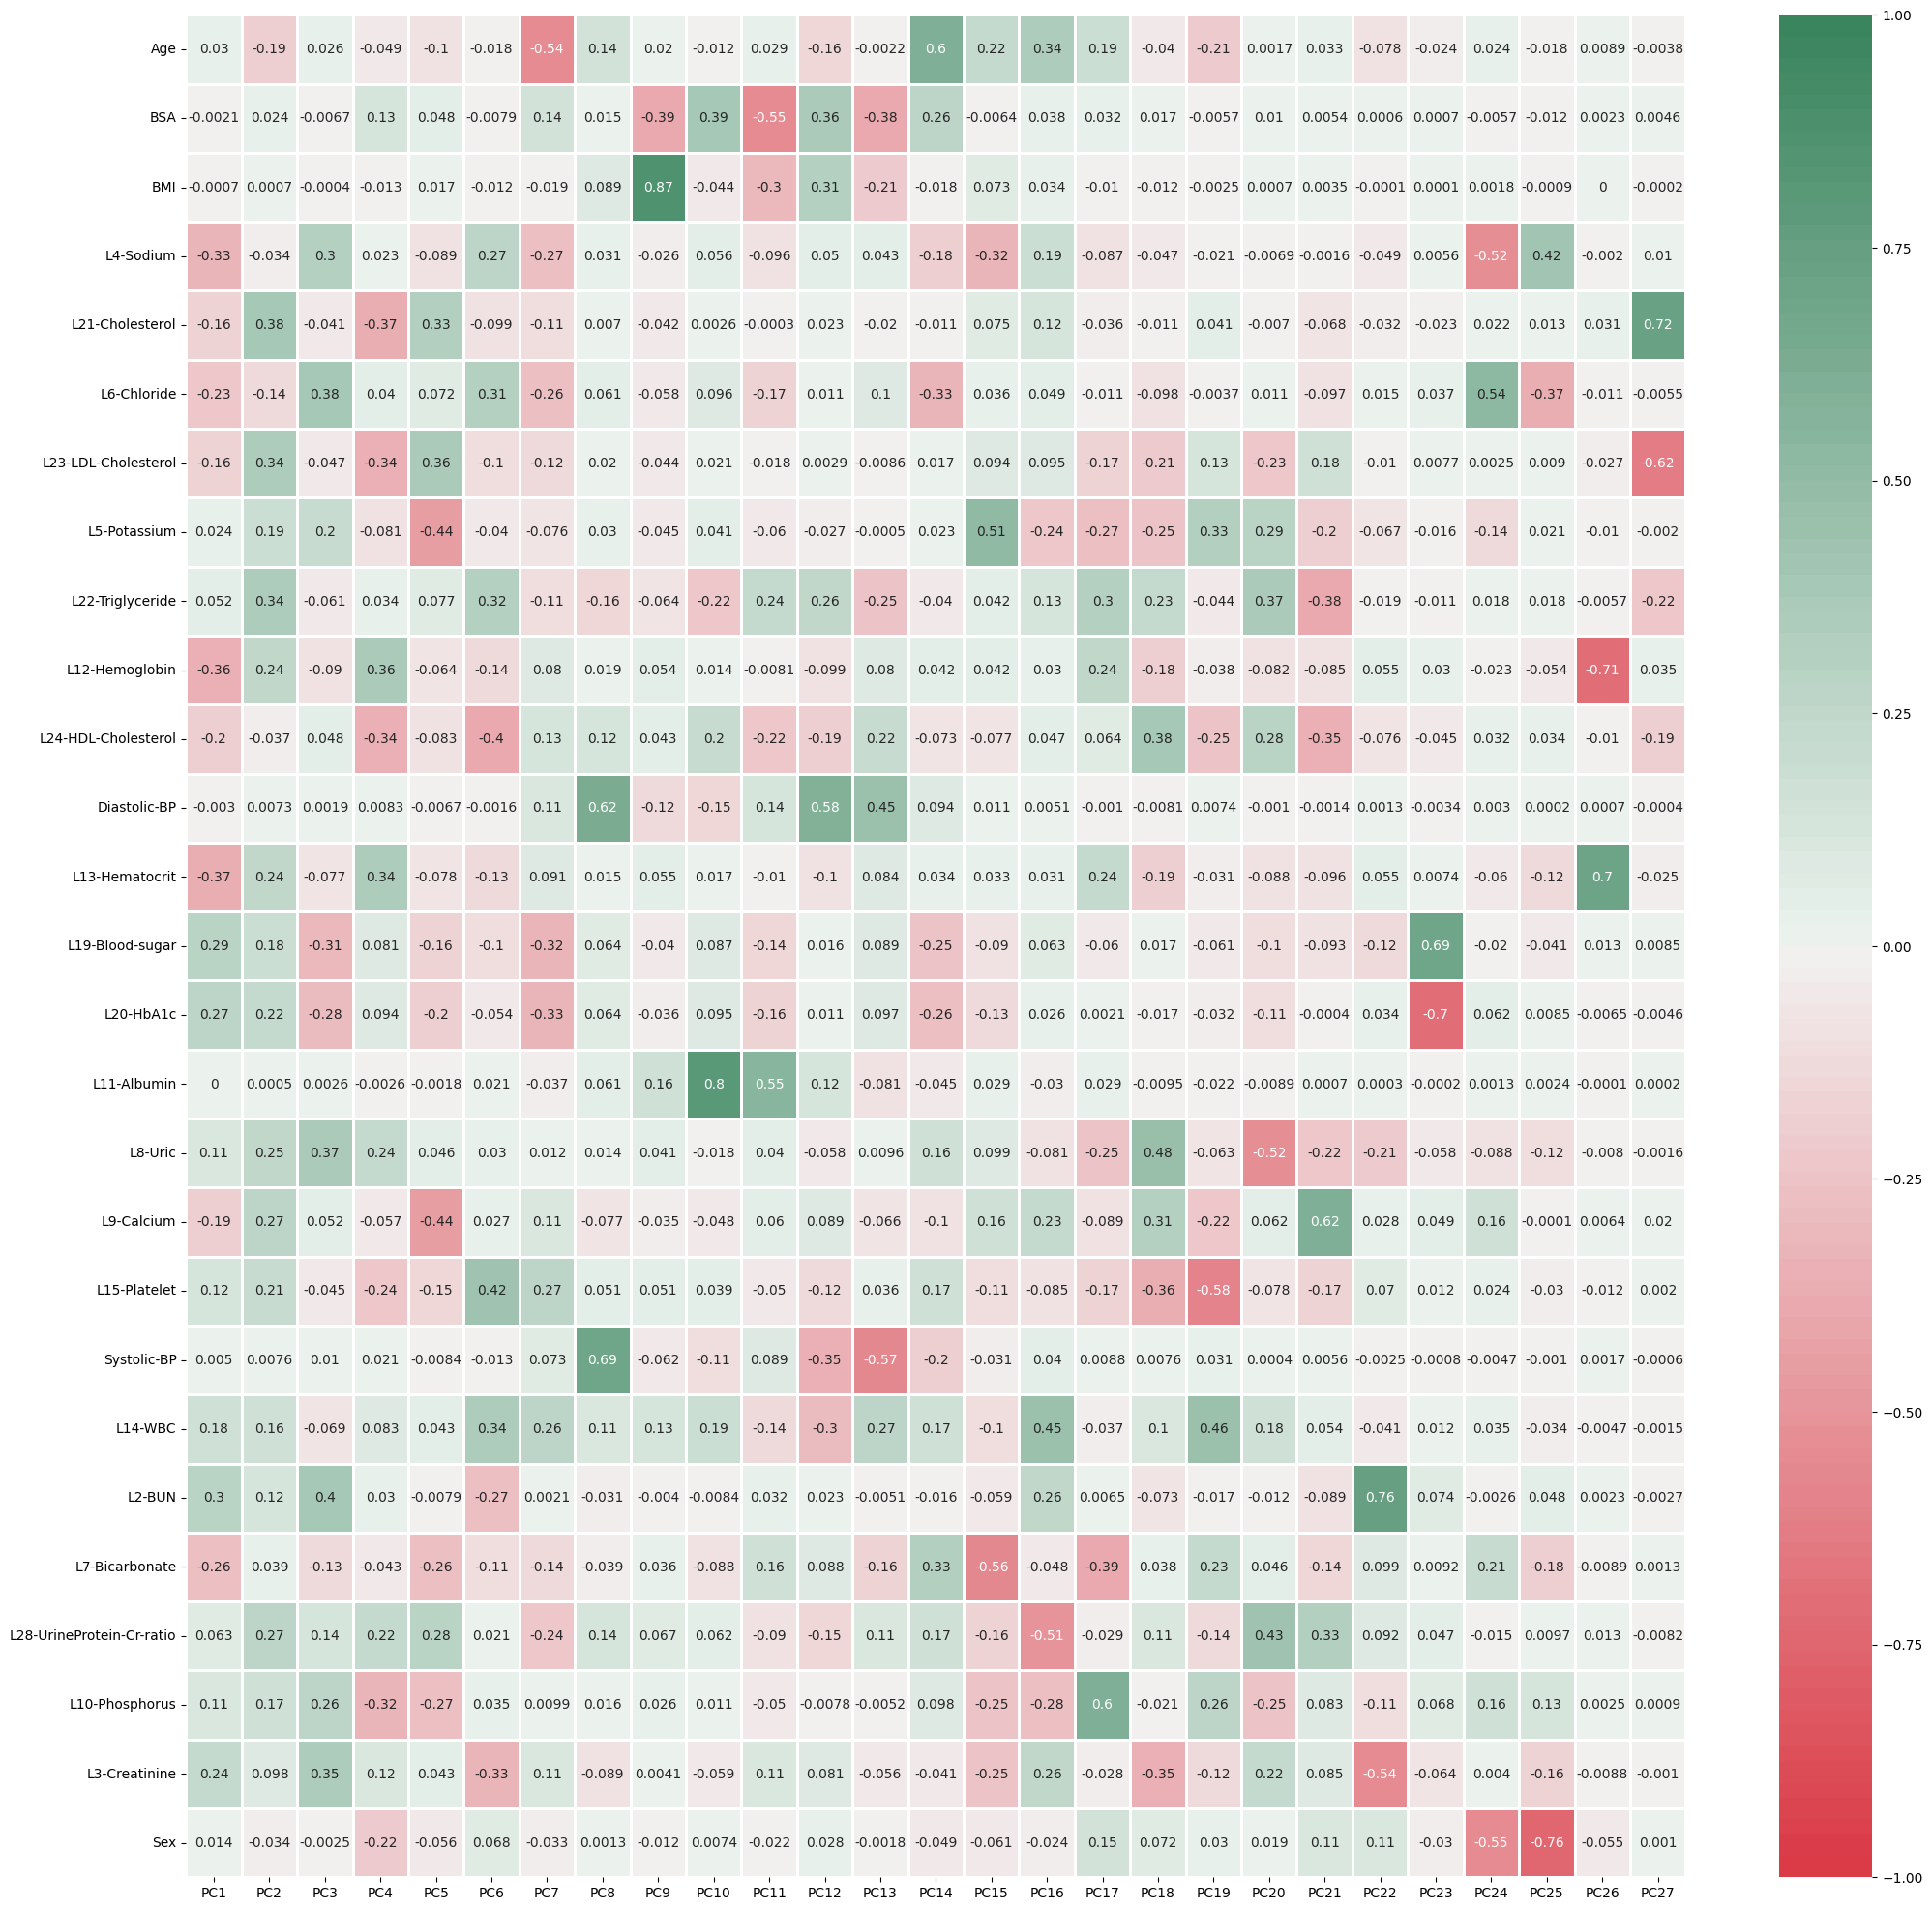

In [29]:
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(dpc, cmap=sns.diverging_palette(10, 145, n=100), linewidths=1,
            center=0, annot=True, vmin=-1, vmax=1)